In [1]:
#https://www.kaggle.com/datasets/nudratabbas/patient-segmentation-data/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report , mean_squared_error,r2_score

In [3]:
df = pd.read_csv("data.csv")
df.head()

,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,Unknown,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,Unknown,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0
2,P10002,58,Female,PA,Unknown,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0
3,P10003,43,Female,GA,Unknown,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1
4,P10004,53,Female,NC,Unknown,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0


In [4]:
df.shape

(2000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2000 non-null   object 
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   State                   2000 non-null   object 
 4   City                    2000 non-null   object 
 5   Height_cm               2000 non-null   int64  
 6   Weight_kg               2000 non-null   int64  
 7   BMI                     2000 non-null   float64
 8   Insurance_Type          2000 non-null   object 
 9   Primary_Condition       1505 non-null   object 
 10  Num_Chronic_Conditions  2000 non-null   int64  
 11  Annual_Visits           2000 non-null   int64  
 12  Avg_Billing_Amount      2000 non-null   float64
 13  Last_Visit_Date         2000 non-null   object 
 14  Days_Since_Last_Visit   2000 non-null   

In [6]:
df.dtypes

PatientID                  object
Age                         int64
Gender                     object
State                      object
City                       object
Height_cm                   int64
Weight_kg                   int64
BMI                       float64
Insurance_Type             object
Primary_Condition          object
Num_Chronic_Conditions      int64
Annual_Visits               int64
Avg_Billing_Amount        float64
Last_Visit_Date            object
Days_Since_Last_Visit       int64
Preventive_Care_Flag        int64
dtype: object

In [7]:
df.describe()

,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Days_Since_Last_Visit,Preventive_Care_Flag
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,50.69550,167.907500,85.143500,30.740650,1.080000,5.466500,4000.270500,180.085000,0.464000
std,15.44445,12.684494,20.385428,8.839952,0.890504,3.485965,2463.239215,104.688484,0.498827
min,18.00000,145.000000,50.000000,13.400000,0.000000,1.000000,207.000000,1.000000,0.000000
25%,40.00000,158.000000,67.000000,23.800000,1.000000,3.000000,2061.000000,90.000000,0.000000
50%,51.00000,168.000000,86.000000,30.100000,1.000000,4.000000,3707.250000,183.000000,0.000000
75%,63.25000,177.000000,103.000000,37.025000,1.000000,8.000000,5650.875000,268.000000,1.000000
max,87.00000,195.000000,120.000000,57.100000,3.000000,12.000000,12467.500000,365.000000,1.000000


In [8]:
df.isna().sum()

PatientID                   0
Age                         0
Gender                      0
State                       0
City                        0
Height_cm                   0
Weight_kg                   0
BMI                         0
Insurance_Type              0
Primary_Condition         495
Num_Chronic_Conditions      0
Annual_Visits               0
Avg_Billing_Amount          0
Last_Visit_Date             0
Days_Since_Last_Visit       0
Preventive_Care_Flag        0
dtype: int64

In [9]:
df['Last_Visit_Date']=pd.to_datetime(df['Last_Visit_Date'])

In [10]:
df.dtypes

PatientID                         object
Age                                int64
Gender                            object
State                             object
City                              object
Height_cm                          int64
Weight_kg                          int64
BMI                              float64
Insurance_Type                    object
Primary_Condition                 object
Num_Chronic_Conditions             int64
Annual_Visits                      int64
Avg_Billing_Amount               float64
Last_Visit_Date           datetime64[ns]
Days_Since_Last_Visit              int64
Preventive_Care_Flag               int64
dtype: object

In [11]:

df['Primary_Condition']=df['Primary_Condition'].fillna("unkown")

In [12]:
df['City'].head()

0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: City, dtype: object

In [13]:
df.drop(columns=['City'],inplace=True)


In [14]:
df.head(2)

,PatientID,Age,Gender,State,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0


<h1>Categorical feature analysis</h1>

In [15]:

df= pd.get_dummies(
    df,
    columns= ['Gender','State','Insurance_Type','Primary_Condition'],
    drop_first=True
    )

In [16]:
df.head(50)

,PatientID,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,...,Insurance_Type_Self-Pay,Primary_Condition_Arthritis,Primary_Condition_Asthma,Primary_Condition_COPD,Primary_Condition_Depression,Primary_Condition_Diabetes,Primary_Condition_Heart Disease,Primary_Condition_Hypertension,Primary_Condition_Obesity,Primary_Condition_unkown
0,P10000,64,151,115,50.4,3,7,2995.0,2025-07-18,186,...,False,True,False,False,False,False,False,False,False,False
1,P10001,59,189,68,19.0,1,8,1209.0,2025-12-12,39,...,False,False,False,False,True,False,False,False,False,False
2,P10002,58,156,91,37.4,1,4,999.0,2025-09-16,126,...,False,False,True,False,False,False,False,False,False,False
3,P10003,43,152,92,39.8,1,6,5638.5,2025-04-09,286,...,False,False,False,False,False,False,False,True,False,False
4,P10004,53,167,51,18.3,1,4,5796.0,2025-03-07,319,...,False,False,True,False,False,False,False,False,False,False
5,P10005,73,160,120,46.9,3,9,2397.5,2025-05-13,252,...,False,False,False,False,False,False,False,False,False,False
6,P10006,34,161,51,19.7,0,3,4668.0,2025-06-11,223,...,False,False,False,False,False,False,False,False,False,True
7,P10007,64,177,102,32.6,3,1,9942.5,2025-05-13,252,...,False,True,False,False,False,False,False,False,False,False
8,P10008,61,171,86,29.4,2,7,1036.0,2025-05-14,251,...,False,True,False,False,False,False,False,False,False,False
9,P10009,34,182,111,33.5,0,1,4602.0,2026-01-09,11,...,False,False,False,False,False,False,False,False,False,True


<h1>feature eneering</h1>

In [17]:
def weight_class(BMI):
    if BMI <18.5:
        return'under weight'
    elif 18.5 <= BMI <25:
        return'normal weight'
    elif 25<=BMI <30:
        return'over weight'
    else:
        return'Obese'

df['weight_class']=df['BMI'].apply(weight_class)
        

In [18]:
df.head(50)

,PatientID,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,...,Primary_Condition_Arthritis,Primary_Condition_Asthma,Primary_Condition_COPD,Primary_Condition_Depression,Primary_Condition_Diabetes,Primary_Condition_Heart Disease,Primary_Condition_Hypertension,Primary_Condition_Obesity,Primary_Condition_unkown,weight_class
0,P10000,64,151,115,50.4,3,7,2995.0,2025-07-18,186,...,True,False,False,False,False,False,False,False,False,Obese
1,P10001,59,189,68,19.0,1,8,1209.0,2025-12-12,39,...,False,False,False,True,False,False,False,False,False,normal weight
2,P10002,58,156,91,37.4,1,4,999.0,2025-09-16,126,...,False,True,False,False,False,False,False,False,False,Obese
3,P10003,43,152,92,39.8,1,6,5638.5,2025-04-09,286,...,False,False,False,False,False,False,True,False,False,Obese
4,P10004,53,167,51,18.3,1,4,5796.0,2025-03-07,319,...,False,True,False,False,False,False,False,False,False,under weight
5,P10005,73,160,120,46.9,3,9,2397.5,2025-05-13,252,...,False,False,False,False,False,False,False,False,False,Obese
6,P10006,34,161,51,19.7,0,3,4668.0,2025-06-11,223,...,False,False,False,False,False,False,False,False,True,normal weight
7,P10007,64,177,102,32.6,3,1,9942.5,2025-05-13,252,...,True,False,False,False,False,False,False,False,False,Obese
8,P10008,61,171,86,29.4,2,7,1036.0,2025-05-14,251,...,True,False,False,False,False,False,False,False,False,over weight
9,P10009,34,182,111,33.5,0,1,4602.0,2026-01-09,11,...,False,False,False,False,False,False,False,False,True,Obese


<h1>iqr and outiler for bmi</h1>

In [19]:
q1 =df['BMI'].quantile(0.25)
q3 =df['BMI'] .quantile(0.75)
iqr =q3-q1

lower = q1-1.5 * iqr
upper = q3 +1.5 * iqr

outliers =df[(df['BMI'] < lower) | (df['BMI']>upper)]

print(f" IQR OF BMI IS {iqr}")
print(outliers[['Age','BMI']].head())

 IQR OF BMI IS 13.224999999999998
      Age   BMI
1585   20  57.1


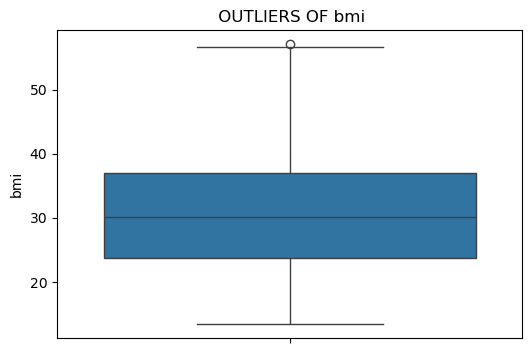

In [20]:


plt.figure(figsize=(6,4))
sns.boxplot(y=df ['BMI'])
plt.title(' OUTLIERS OF bmi')
plt.ylabel('bmi')
plt.show()

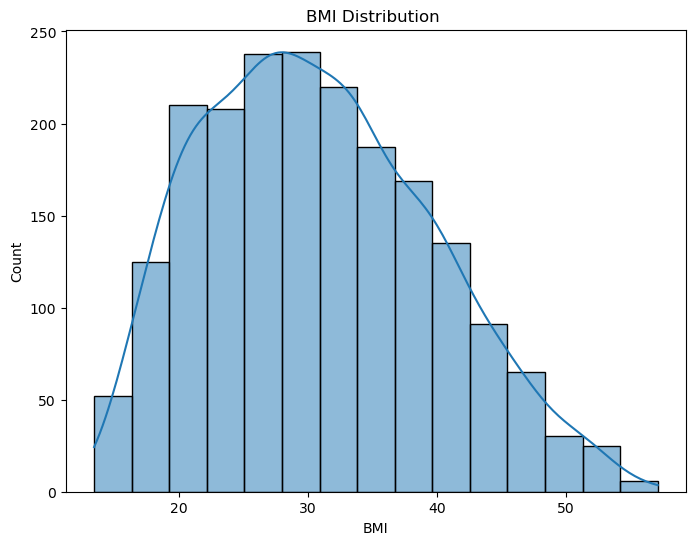

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'],kde=True,bins =15)
plt.title("BMI Distribution ")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

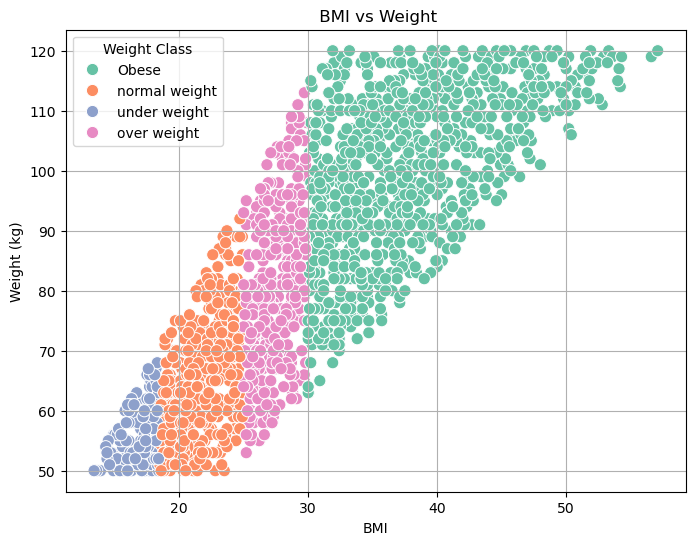

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="BMI",
    y="Weight_kg",
    hue="weight_class",
    palette="Set2",
    s=77

)

plt.title(" BMI vs Weight")
plt.xlabel("BMI")
plt.ylabel("Weight (kg)")
plt.legend(title="Weight Class")
plt.grid(True)
plt.show()

<h1>aplyying knn classifier for weight class</h1>

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
df.head()

,PatientID,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,...,Primary_Condition_Arthritis,Primary_Condition_Asthma,Primary_Condition_COPD,Primary_Condition_Depression,Primary_Condition_Diabetes,Primary_Condition_Heart Disease,Primary_Condition_Hypertension,Primary_Condition_Obesity,Primary_Condition_unkown,weight_class
0,P10000,64,151,115,50.4,3,7,2995.0,2025-07-18,186,...,True,False,False,False,False,False,False,False,False,Obese
1,P10001,59,189,68,19.0,1,8,1209.0,2025-12-12,39,...,False,False,False,True,False,False,False,False,False,normal weight
2,P10002,58,156,91,37.4,1,4,999.0,2025-09-16,126,...,False,True,False,False,False,False,False,False,False,Obese
3,P10003,43,152,92,39.8,1,6,5638.5,2025-04-09,286,...,False,False,False,False,False,False,True,False,False,Obese
4,P10004,53,167,51,18.3,1,4,5796.0,2025-03-07,319,...,False,True,False,False,False,False,False,False,False,under weight


In [25]:
X = df.drop(columns=['PatientID','weight_class','Last_Visit_Date'])
y = df['weight_class']

In [26]:
#split train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)

In [27]:
#scaling
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
knn_clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

In [29]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.545


In [30]:
print("Classification Report", classification_report(y_test, y_pred))

Classification Report                precision    recall  f1-score   support

        Obese       0.64      0.84      0.73       101
normal weight       0.42      0.40      0.41        45
  over weight       0.30      0.15      0.20        40
 under weight       0.00      0.00      0.00        14

     accuracy                           0.55       200
    macro avg       0.34      0.35      0.33       200
 weighted avg       0.48      0.55      0.50       200



In [31]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[85  9  5  2]
 [19 18  6  2]
 [25  9  6  0]
 [ 4  7  3  0]]


<h1> Rndom foresr </h1>h1>

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
                                 
 


In [34]:
print("Accuracy:",accuracy_score(y_test, y_pred_rf))

Accuracy: 0.995


In [35]:
print("Classification Report", classification_report(y_test, y_pred_rf))

Classification Report                precision    recall  f1-score   support

        Obese       1.00      1.00      1.00       101
normal weight       0.98      1.00      0.99        45
  over weight       1.00      1.00      1.00        40
 under weight       1.00      0.93      0.96        14

     accuracy                           0.99       200
    macro avg       0.99      0.98      0.99       200
 weighted avg       1.00      0.99      0.99       200



from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_rf))

<h1>knn regression to find Bmi</h1>

In [36]:
df.head()

,PatientID,Age,Height_cm,Weight_kg,BMI,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,...,Primary_Condition_Arthritis,Primary_Condition_Asthma,Primary_Condition_COPD,Primary_Condition_Depression,Primary_Condition_Diabetes,Primary_Condition_Heart Disease,Primary_Condition_Hypertension,Primary_Condition_Obesity,Primary_Condition_unkown,weight_class
0,P10000,64,151,115,50.4,3,7,2995.0,2025-07-18,186,...,True,False,False,False,False,False,False,False,False,Obese
1,P10001,59,189,68,19.0,1,8,1209.0,2025-12-12,39,...,False,False,False,True,False,False,False,False,False,normal weight
2,P10002,58,156,91,37.4,1,4,999.0,2025-09-16,126,...,False,True,False,False,False,False,False,False,False,Obese
3,P10003,43,152,92,39.8,1,6,5638.5,2025-04-09,286,...,False,False,False,False,False,False,True,False,False,Obese
4,P10004,53,167,51,18.3,1,4,5796.0,2025-03-07,319,...,False,True,False,False,False,False,False,False,False,under weight


In [37]:
x_knn =df.drop(columns=['PatientID',"BMI","Last_Visit_Date","weight_class"])
y_knn =df["BMI"]

In [38]:
#TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(x_knn,y_knn,test_size=0.2,random_state=42)

In [39]:
#feature scaling
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)


In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
#traning knn regressor model
knn_model =KNeighborsRegressor(
    n_neighbors=5,
    weights='distance'
)
knn_model.fit(X_train_scaled,y_train)


KNeighborsRegressor(weights='distance')

In [42]:
#predict
y_pred_knn =knn_model.predict(X_test_scaled)

In [43]:

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("R2 Score:", r2_score(y_test, y_pred_knn))

RMSE: 6.690616869941299
R2 Score: 0.4208566840699224
